<a href="https://colab.research.google.com/github/ShamScripts/FreeCodeCamp/blob/main/Linear_Regression_Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#try:
#  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

ModuleNotFoundError: No module named 'tensorflow_docs'

In [2]:
!apt install wget

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv


--2025-03-19 11:57:48--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.006s  

2025-03-19 11:57:49 (7.38 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [4]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
%pip install seaborn

In [6]:
import seaborn as sns

In [7]:
df = dataset

<Axes: >

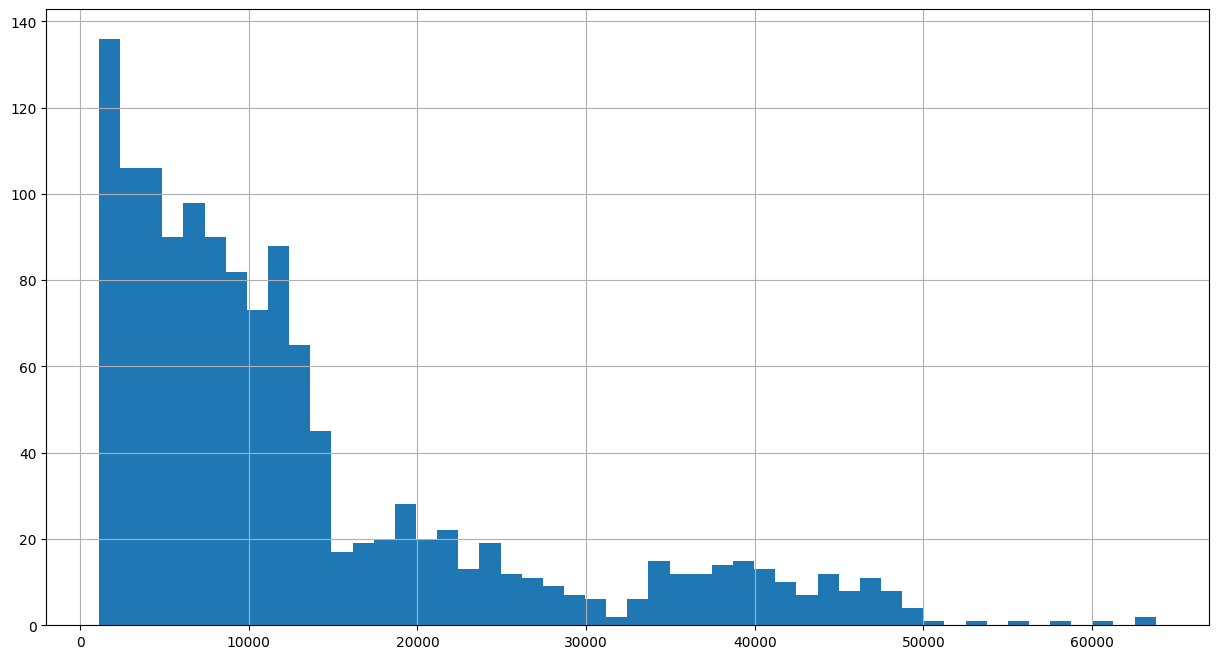

In [8]:
df.expenses.hist(bins=50, figsize=(15,8))

In [9]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
#One-hot encode categorical columns
df = dataset
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], prefix=['', 'smoker_', ''], prefix_sep='')
df.tail()

,age,bmi,children,expenses,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True
1337,61,29.1,0,29141.36,True,False,False,True,False,True,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   expenses    1338 non-null   float64
 4   female      1338 non-null   bool   
 5   male        1338 non-null   bool   
 6   smoker_no   1338 non-null   bool   
 7   smoker_yes  1338 non-null   bool   
 8   northeast   1338 non-null   bool   
 9   northwest   1338 non-null   bool   
 10  southeast   1338 non-null   bool   
 11  southwest   1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


In [14]:
# Seperate training and testing data
train_dataset = df.sample(frac = 0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

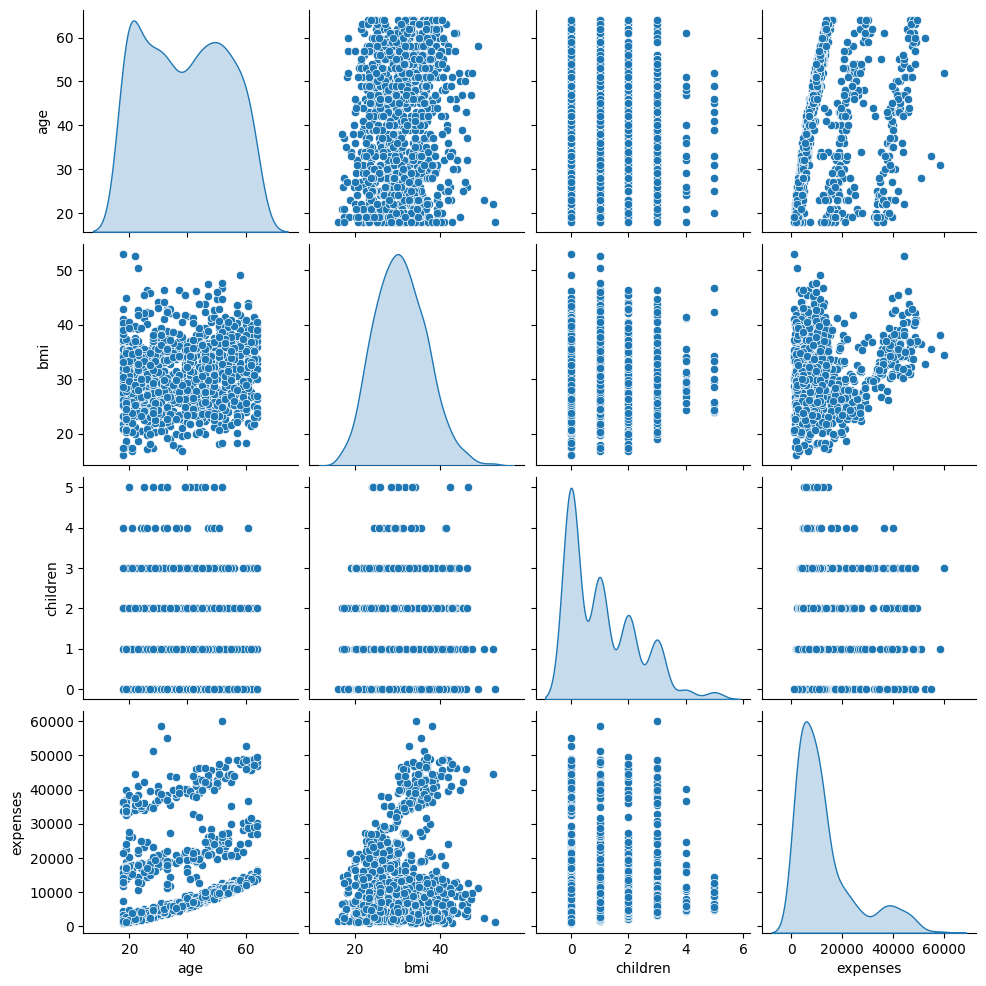

In [15]:
sns.pairplot(train_dataset[['age', 'bmi', 'children', 'expenses']], diag_kind='kde')

In [16]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.00,26.000,39.000,51.0000,64.0
bmi,1070.0,30.737290,6.065193,16.00,26.300,30.500,34.8000,53.1
children,1070.0,1.093458,1.211364,0.00,0.000,1.000,2.0000,5.0
expenses,1070.0,13056.551654,11994.260172,1121.87,4565.995,9289.085,15826.1125,60021.4


In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [19]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
age,39.036449,14.142122
bmi,30.737290,6.065193
children,1.093458,1.211364
expenses,13056.551654,11994.260172


In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [20]:
normalizer.adapt(np.array(train_features))

In [21]:
print(normalizer.mean.numpy())

[[39.03645    30.73729     1.0934579   0.50186914  0.49813083  0.80093455
   0.19906542  0.24859813  0.23551401  0.2813084   0.23457944]]


In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [expenses]')
    plt.legend()
    plt.grid(True)

In [23]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae', 'mse'])
    return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=200
)

In [ ]:
plot_loss(history)

In [24]:
# Fix variables to fit final snippet of code
model = dnn_model
test_dataset = test_features

NameError: name 'dnn_model' is not defined

In [25]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


NameError: name 'model' is not defined